MCA RESULTS PREDICTION

In [7]:
#Collecting Data
#Analyzing Data
#Data Wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Collecting Data

In [9]:
results_df = pd.read_csv('data/results.csv')
results_pred_df = pd.read_csv('data/results_pred.csv')
combine = [results_df, results_pred_df]

Analyzing Data

In [10]:
#print[results_df.columns.values]

In [4]:
#print[results_pred_df.columns.values]

In [11]:
results_df.tail()

,ID,EDUCATION,NAME,GENDER,AGE,SSC,HSC,MCA%,MCA%R,ACADEMICGAP,LAB_WORK,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT
99,100,Graduate,Kantor Sinai,male,25,62.45,62.78,68.40,4,Yes,No,Average,Average,CS,1
100,101,Graduate,Petranec Matilda,female,25,61.60,63.17,56.54,2,No,Yes,Poor,Poor,CS,0
101,102,Graduate,Petroff Pastcho,male,24,69.73,61.83,54.55,2,No,Yes,Poor,Poor,CS,0
102,103,Graduate,White Richard Frasar,male,22,62.97,67.89,76.77,5,No,No,Good,Poor,CS,1
103,104,Graduate,sean Dedious,male,23,73.60,65.33,67.43,4,No,No,Average,Good,CS,1


In [12]:
results_pred_df.tail()

,ID,EDUCATION,NAME,GENDER,AGE,SSC,HSC,MCA%,MCA%R,ACADEMICGAP,LAB_WORK,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND
99,600,Graduate,Shorney Charles Joseph,male,25,62.78,68.40,68.40,4,Yes,Yes,Average,Average,Art
100,601,Graduate,Goldschmidt George B,female,21,63.17,56.54,56.54,2,No,Yes,Poor,Poor,CS
101,602,Graduate,Greenfield William Bertram,male,21,61.83,54.55,54.55,2,No,Yes,Poor,Poor,CS
102,603,Graduate,Doling John T,male,22,67.89,76.77,79.80,5,Yes,No,Good,Poor,CS
103,604,Graduate,Kantor Sinai,male,23,65.33,67.43,69.76,4,No,No,Average,Good,CS


In [13]:
results_df.info()
print('_'*50)
results_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 15 columns):
ID                    104 non-null int64
EDUCATION             104 non-null object
NAME                  104 non-null object
GENDER                104 non-null object
AGE                   104 non-null int64
SSC                   104 non-null float64
HSC                   104 non-null float64
MCA%                  104 non-null float64
MCA%R                 104 non-null int64
ACADEMICGAP           104 non-null object
LAB_WORK              104 non-null object
SEMINAR               104 non-null object
COMMUNICATIONSKILL    104 non-null object
GRADBACKGROUND        104 non-null object
PLACEMENT             104 non-null int64
dtypes: float64(3), int64(4), object(8)
memory usage: 9.0+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
ID                    104 non-null int64
EDUCATI

In [14]:
results_pred_df.describe()

,ID,AGE,SSC,HSC,MCA%,MCA%R
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,552.500000,22.990385,64.416731,67.114135,68.857692,4.182692
std,30.166206,1.458122,6.805914,7.426052,8.589512,1.543948
min,501.000000,21.000000,45.600000,43.460000,43.460000,1.000000
25%,526.750000,22.000000,61.595000,61.920000,62.422500,3.000000
50%,552.500000,23.000000,64.930000,67.460000,67.800000,4.000000
75%,578.250000,24.000000,67.890000,74.770000,76.170000,5.000000
max,604.000000,26.000000,80.670000,77.110000,89.560000,8.000000


In [15]:
results_df.describe()

,ID,AGE,SSC,HSC,MCA%,MCA%R,PLACEMENT
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,23.375000,69.476250,64.320577,67.123750,3.884615,0.394231
std,30.166206,1.690565,6.768623,6.684122,7.437223,1.217252,0.491051
min,1.000000,21.000000,51.860000,45.600000,43.460000,1.000000,0.000000
25%,26.750000,22.000000,65.060000,61.595000,61.920000,3.000000,0.000000
50%,52.500000,23.000000,69.730000,64.930000,67.460000,4.000000,0.000000
75%,78.250000,25.000000,73.330000,67.890000,74.770000,5.000000,1.000000
max,104.000000,27.000000,87.900000,80.670000,77.110000,6.000000,1.000000


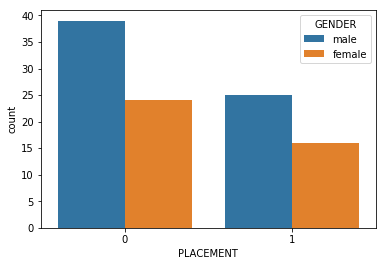

In [16]:
sns.countplot(x="PLACEMENT",hue= "GENDER", data=results_df)

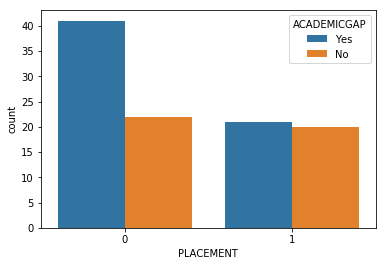

In [17]:
sns.countplot(x="PLACEMENT",hue= "ACADEMICGAP", data=results_df)

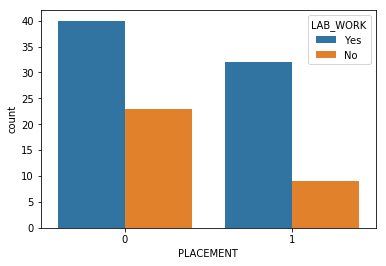

In [18]:
sns.countplot(x="PLACEMENT",hue= "LAB_WORK", data=results_df)

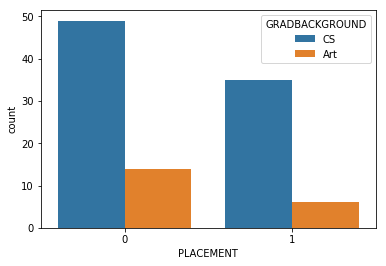

In [19]:
sns.countplot(x="PLACEMENT",hue= "GRADBACKGROUND", data=results_df)

In [20]:
results_df.describe(include=['O'])

,EDUCATION,NAME,GENDER,ACADEMICGAP,LAB_WORK,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND
count,104,104,104,104,104,104,104,104
unique,1,85,2,2,2,3,3,2
top,Graduate,sean Dedious,male,Yes,Yes,Average,Poor,CS
freq,104,4,64,62,72,43,46,84


In [21]:
results_df[['MCA%R', 'PLACEMENT']].groupby(['MCA%R'], as_index=False).mean().sort_values(by='PLACEMENT', ascending=False)

,MCA%R,PLACEMENT
5,6,0.818182
3,4,0.720000
4,5,0.347826
2,3,0.166667
0,1,0.000000
1,2,0.000000


In [22]:
results_df[['GRADBACKGROUND', 'PLACEMENT']].groupby(['GRADBACKGROUND'], as_index=False).mean().sort_values(by='PLACEMENT', ascending=False)

,GRADBACKGROUND,PLACEMENT
1,CS,0.416667
0,Art,0.300000


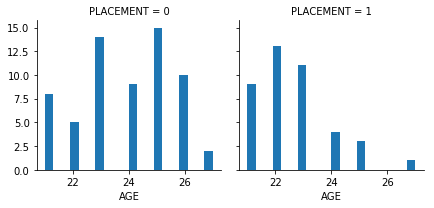

In [23]:
g = sns.FacetGrid(results_df, col='PLACEMENT')
g.map(plt.hist, 'AGE', bins=20)

c:\python3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


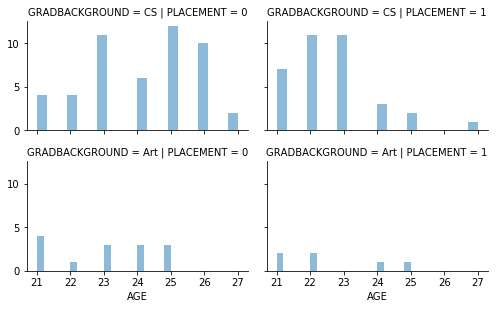

In [24]:
grid = sns.FacetGrid(results_df, col='PLACEMENT', row='GRADBACKGROUND', size=2.2, aspect=1.6)
grid.map(plt.hist, 'AGE', alpha=.5, bins=20)
grid.add_legend();

c:\python3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


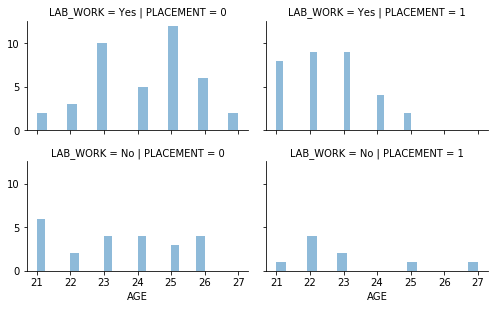

In [25]:
grid = sns.FacetGrid(results_df, col='PLACEMENT', row='LAB_WORK', size=2.2, aspect=1.6)
grid.map(plt.hist, 'AGE', alpha=.5, bins=20)
grid.add_legend();

c:\python3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


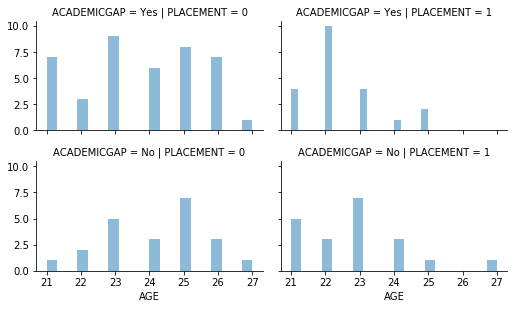

In [26]:
grid = sns.FacetGrid(results_df, col='PLACEMENT', row='ACADEMICGAP', size=2.2, aspect=1.6)
grid.map(plt.hist, 'AGE', alpha=.5, bins=20)
grid.add_legend();

c:\python3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\python3.7\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\python3.7\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\python3.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


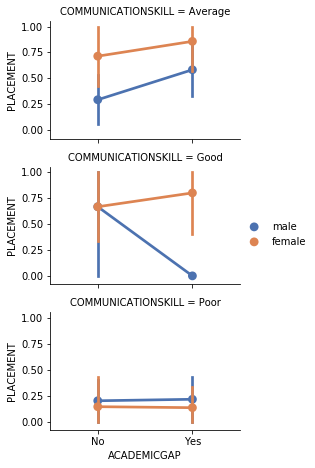

In [27]:
grid = sns.FacetGrid(results_df, row='COMMUNICATIONSKILL', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'ACADEMICGAP', 'PLACEMENT', 'GENDER', palette='deep')
grid.add_legend()

In [28]:
print("Before Drop Results", results_df.shape, results_pred_df.shape, combine[0].shape, combine[1].shape)

results_df = results_df.drop(['EDUCATION', 'NAME'], axis=1)
results_pred_df = results_pred_df.drop(['EDUCATION', 'NAME'], axis=1)
combine = [results_df, results_pred_df]

"After Drop Results", results_df.shape, results_pred_df.shape, combine[0].shape, combine[1].shape

Before Drop Results (104, 15) (104, 14) (104, 15) (104, 14)


('After Drop Results', (104, 13), (104, 12), (104, 13), (104, 12))

In [29]:
for dataset in combine:
    dataset['GENDER'] = dataset['GENDER'].map( {'female': 1, 'male': 0} ).astype(int)

results_df.head()


,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,ACADEMICGAP,LAB_WORK,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT
0,1,0,23,73.60,65.33,67.43,4,Yes,Yes,Average,Average,CS,1
1,2,1,22,86.50,67.83,76.17,6,Yes,Yes,Poor,Good,CS,1
2,3,1,21,70.26,64.17,67.80,4,No,Yes,Average,Average,CS,1
3,4,1,22,69.89,65.67,76.45,6,No,Yes,Average,Average,CS,1
4,5,0,27,61.60,63.17,60.57,3,No,Yes,Poor,Poor,CS,0


In [30]:
results_pred_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,ACADEMICGAP,LAB_WORK,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND
0,501,0,23,65.33,67.43,69.43,4,Yes,Yes,Average,Average,CS
1,502,1,22,77.83,75.17,76.17,6,Yes,No,Poor,Good,CS
2,503,0,21,64.17,67.80,67.80,4,No,No,Average,Average,CS
3,504,0,22,65.67,76.45,76.45,6,No,Yes,Average,Average,Art
4,505,1,23,63.17,60.57,60.57,3,No,Yes,Poor,Poor,Art


In [31]:
results_df['AgeBand'] = pd.cut(mca_results_df['AGE'], 5)
results_df[['AgeBand', 'PLACEMENT']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,PLACEMENT
0,"(20.994, 22.2]",0.628571
1,"(22.2, 23.4]",0.440000
2,"(23.4, 24.6]",0.307692
3,"(24.6, 25.8]",0.166667
4,"(25.8, 27.0]",0.076923


c:\python3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\python3.7\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


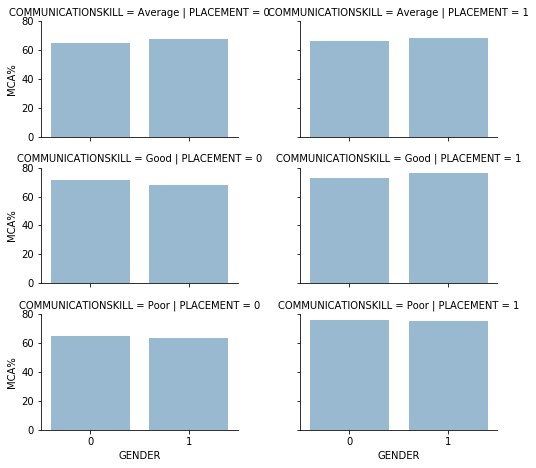

In [32]:
grid = sns.FacetGrid(results_df, row='COMMUNICATIONSKILL', col='PLACEMENT', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'GENDER', 'MCA%', alpha=.5, ci=None)
grid.add_legend()

In [33]:
#mca_results_df.head()
results_df[['AgeBand', 'PLACEMENT']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,PLACEMENT
0,"(20.994, 22.2]",0.628571
1,"(22.2, 23.4]",0.440000
2,"(23.4, 24.6]",0.307692
3,"(24.6, 25.8]",0.166667
4,"(25.8, 27.0]",0.076923


In [34]:
for dataset in combine:
    dataset.loc[ dataset['AGE'] <= 22.2, 'AGE'] = 0
    dataset.loc[(dataset['AGE'] > 22.2) & (dataset['AGE'] <= 23.4), 'AGE'] = 1
    dataset.loc[(dataset['AGE'] > 23.4) & (dataset['AGE'] <= 24.6), 'AGE'] = 2
    dataset.loc[(dataset['AGE'] > 24.6) & (dataset['AGE'] <= 25.8), 'AGE'] = 3
    dataset.loc[ dataset['AGE'] > 25.8, 'AGE']
results_df.head()


,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,ACADEMICGAP,LAB_WORK,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,AgeBand
0,1,0,1,73.60,65.33,67.43,4,Yes,Yes,Average,Average,CS,1,"(22.2, 23.4]"
1,2,1,0,86.50,67.83,76.17,6,Yes,Yes,Poor,Good,CS,1,"(20.994, 22.2]"
2,3,1,0,70.26,64.17,67.80,4,No,Yes,Average,Average,CS,1,"(20.994, 22.2]"
3,4,1,0,69.89,65.67,76.45,6,No,Yes,Average,Average,CS,1,"(20.994, 22.2]"
4,5,0,27,61.60,63.17,60.57,3,No,Yes,Poor,Poor,CS,0,"(25.8, 27.0]"


In [35]:
results_df.tail()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,ACADEMICGAP,LAB_WORK,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,AgeBand
99,100,0,3,62.45,62.78,68.40,4,Yes,No,Average,Average,CS,1,"(24.6, 25.8]"
100,101,1,3,61.60,63.17,56.54,2,No,Yes,Poor,Poor,CS,0,"(24.6, 25.8]"
101,102,0,2,69.73,61.83,54.55,2,No,Yes,Poor,Poor,CS,0,"(23.4, 24.6]"
102,103,0,0,62.97,67.89,76.77,5,No,No,Good,Poor,CS,1,"(20.994, 22.2]"
103,104,0,1,73.60,65.33,67.43,4,No,No,Average,Good,CS,1,"(22.2, 23.4]"


In [36]:
results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,ACADEMICGAP,LAB_WORK,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,AgeBand
0,1,0,1,73.60,65.33,67.43,4,Yes,Yes,Average,Average,CS,1,"(22.2, 23.4]"
1,2,1,0,86.50,67.83,76.17,6,Yes,Yes,Poor,Good,CS,1,"(20.994, 22.2]"
2,3,1,0,70.26,64.17,67.80,4,No,Yes,Average,Average,CS,1,"(20.994, 22.2]"
3,4,1,0,69.89,65.67,76.45,6,No,Yes,Average,Average,CS,1,"(20.994, 22.2]"
4,5,0,27,61.60,63.17,60.57,3,No,Yes,Poor,Poor,CS,0,"(25.8, 27.0]"


In [38]:
results_df  = results_df.drop(['AgeBand'], axis = 1)
combine = [results_df, results_pred_df]
results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,ACADEMICGAP,LAB_WORK,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT
0,1,0,1,73.60,65.33,67.43,4,Yes,Yes,Average,Average,CS,1
1,2,1,0,86.50,67.83,76.17,6,Yes,Yes,Poor,Good,CS,1
2,3,1,0,70.26,64.17,67.80,4,No,Yes,Average,Average,CS,1
3,4,1,0,69.89,65.67,76.45,6,No,Yes,Average,Average,CS,1
4,5,0,27,61.60,63.17,60.57,3,No,Yes,Poor,Poor,CS,0


In [39]:
for dataset in combine:
    dataset['ACADEMICGAP'] = dataset['ACADEMICGAP'].map( {'Yes': 1, 'No': 0} ).astype(int)

results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,ACADEMICGAP,LAB_WORK,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT
0,1,0,1,73.60,65.33,67.43,4,1,Yes,Average,Average,CS,1
1,2,1,0,86.50,67.83,76.17,6,1,Yes,Poor,Good,CS,1
2,3,1,0,70.26,64.17,67.80,4,0,Yes,Average,Average,CS,1
3,4,1,0,69.89,65.67,76.45,6,0,Yes,Average,Average,CS,1
4,5,0,27,61.60,63.17,60.57,3,0,Yes,Poor,Poor,CS,0


In [40]:
for dataset in combine:
    dataset['LAB_WORK'] = dataset['LAB_WORK'].map( {'Yes': 1, 'No': 0} ).astype(int)

results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,ACADEMICGAP,LAB_WORK,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT
0,1,0,1,73.60,65.33,67.43,4,1,1,Average,Average,CS,1
1,2,1,0,86.50,67.83,76.17,6,1,1,Poor,Good,CS,1
2,3,1,0,70.26,64.17,67.80,4,0,1,Average,Average,CS,1
3,4,1,0,69.89,65.67,76.45,6,0,1,Average,Average,CS,1
4,5,0,27,61.60,63.17,60.57,3,0,1,Poor,Poor,CS,0


In [41]:
for dataset in combine:
    dataset['ACADEMICCOMM'] = dataset['ACADEMICGAP'] + dataset['LAB_WORK'] + 1

results_df[['ACADEMICCOMM', 'PLACEMENT']].groupby(['ACADEMICCOMM'], as_index=False).mean().sort_values(by='PLACEMENT', ascending=False)

,ACADEMICCOMM,PLACEMENT
0,1,0.714286
2,3,0.459459
1,2,0.316667


In [42]:
for dataset in combine:
    dataset['ISGAPCOMM'] = 0
    dataset.loc[dataset['ACADEMICCOMM'] == 1, 'ISGAPCOMM'] = 1

results_df[['ISGAPCOMM', 'PLACEMENT']].groupby(['ISGAPCOMM'], as_index=False).mean()

,ISGAPCOMM,PLACEMENT
0,0,0.371134
1,1,0.714286


In [43]:
results_df = results_df.drop(['ACADEMICGAP', 'LAB_WORK', 'ACADEMICCOMM'], axis=1)
results_pred_df = results_pred_df.drop(['ACADEMICGAP', 'LAB_WORK', 'ACADEMICCOMM'], axis=1)
combine = [results_df, results_pred_df]

results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,1,0,1,73.60,65.33,67.43,4,Average,Average,CS,1,0
1,2,1,0,86.50,67.83,76.17,6,Poor,Good,CS,1,0
2,3,1,0,70.26,64.17,67.80,4,Average,Average,CS,1,0
3,4,1,0,69.89,65.67,76.45,6,Average,Average,CS,1,0
4,5,0,27,61.60,63.17,60.57,3,Poor,Poor,CS,0,0


In [44]:
for dataset in combine:
    dataset['GRADBACKGROUND'] = dataset['GRADBACKGROUND'].map( {'CS': 1, 'Art': 0} ).astype(int)

results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,1,0,1,73.60,65.33,67.43,4,Average,Average,1,1,0
1,2,1,0,86.50,67.83,76.17,6,Poor,Good,1,1,0
2,3,1,0,70.26,64.17,67.80,4,Average,Average,1,1,0
3,4,1,0,69.89,65.67,76.45,6,Average,Average,1,1,0
4,5,0,27,61.60,63.17,60.57,3,Poor,Poor,1,0,0


In [45]:
freq_port = results_df.SEMINAR.dropna().mode()[0]
freq_port

'Average'

In [46]:
for dataset in combine:
    dataset['SEMINAR'] = dataset['SEMINAR'].fillna(freq_port)
results_df[['SEMINAR', 'PLACEMENT']].groupby(['SEMINAR'], as_index=False).mean().sort_values(by='PLACEMENT', ascending=False)


,SEMINAR,PLACEMENT
1,Good,0.578947
0,Average,0.558140
2,Poor,0.142857


In [47]:
for dataset in combine:
    dataset['SEMINAR'] = dataset['SEMINAR'].map( {'Poor': 0, 'Average': 1, 'Good': 2} ).astype(int)

results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,1,0,1,73.60,65.33,67.43,4,1,Average,1,1,0
1,2,1,0,86.50,67.83,76.17,6,0,Good,1,1,0
2,3,1,0,70.26,64.17,67.80,4,1,Average,1,1,0
3,4,1,0,69.89,65.67,76.45,6,1,Average,1,1,0
4,5,0,27,61.60,63.17,60.57,3,0,Poor,1,0,0


In [48]:
commskill_port = results_df.COMMUNICATIONSKILL.dropna().mode()[0]
commskill_port

'Poor'

In [49]:
for dataset in combine:
    dataset['COMMUNICATIONSKILL'] = dataset['COMMUNICATIONSKILL'].fillna(commskill_port)
results_df[['COMMUNICATIONSKILL', 'PLACEMENT']].groupby(['COMMUNICATIONSKILL'], as_index=False).mean().sort_values(by='PLACEMENT', ascending=False)


,COMMUNICATIONSKILL,PLACEMENT
1,Good,0.666667
0,Average,0.534884
2,Poor,0.173913


In [50]:
for dataset in combine:
    dataset['COMMUNICATIONSKILL'] = dataset['COMMUNICATIONSKILL'].map( {'Poor': 0, 'Average': 1, 'Good': 2} ).astype(int)
results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,1,0,1,73.60,65.33,67.43,4,1,1,1,1,0
1,2,1,0,86.50,67.83,76.17,6,0,2,1,1,0
2,3,1,0,70.26,64.17,67.80,4,1,1,1,1,0
3,4,1,0,69.89,65.67,76.45,6,1,1,1,1,0
4,5,0,27,61.60,63.17,60.57,3,0,0,1,0,0


In [51]:
results_df['MCA%'].fillna(results_df['MCA%'].dropna().median(), inplace=True)
results_df.head()


,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,1,0,1,73.60,65.33,67.43,4,1,1,1,1,0
1,2,1,0,86.50,67.83,76.17,6,0,2,1,1,0
2,3,1,0,70.26,64.17,67.80,4,1,1,1,1,0
3,4,1,0,69.89,65.67,76.45,6,1,1,1,1,0
4,5,0,27,61.60,63.17,60.57,3,0,0,1,0,0


In [52]:
results_df['MCAPerc'] = pd.cut(results_df['MCA%'], 5)
results_df[['MCAPerc', 'PLACEMENT']].groupby(['MCAPerc'], as_index=False).mean().sort_values(by='MCAPerc', ascending=True)

,MCAPerc,PLACEMENT
0,"(43.426, 50.19]",0.000000
1,"(50.19, 56.92]",0.000000
2,"(56.92, 63.65]",0.147059
3,"(63.65, 70.38]",0.612903
4,"(70.38, 77.11]",0.500000


In [53]:
results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM,MCAPerc
0,1,0,1,73.60,65.33,67.43,4,1,1,1,1,0,"(63.65, 70.38]"
1,2,1,0,86.50,67.83,76.17,6,0,2,1,1,0,"(70.38, 77.11]"
2,3,1,0,70.26,64.17,67.80,4,1,1,1,1,0,"(63.65, 70.38]"
3,4,1,0,69.89,65.67,76.45,6,1,1,1,1,0,"(70.38, 77.11]"
4,5,0,27,61.60,63.17,60.57,3,0,0,1,0,0,"(56.92, 63.65]"


In [54]:
results_df = results_df.drop(['MCAPerc'], axis=1)
combine = [results_df, results_pred_df]
results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,1,0,1,73.60,65.33,67.43,4,1,1,1,1,0
1,2,1,0,86.50,67.83,76.17,6,0,2,1,1,0
2,3,1,0,70.26,64.17,67.80,4,1,1,1,1,0
3,4,1,0,69.89,65.67,76.45,6,1,1,1,1,0
4,5,0,27,61.60,63.17,60.57,3,0,0,1,0,0


In [55]:
results_pred_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,ISGAPCOMM
0,501,0,1,65.33,67.43,69.43,4,1,1,1,0
1,502,1,0,77.83,75.17,76.17,6,0,2,1,0
2,503,0,0,64.17,67.80,67.80,4,1,1,1,1
3,504,0,0,65.67,76.45,76.45,6,1,1,0,0
4,505,1,1,63.17,60.57,60.57,3,0,0,0,0


In [56]:
results_df['MCAPerc'] = pd.cut(results_df['MCA%'], 6)
results_df[['MCAPerc', 'PLACEMENT']].groupby(['MCAPerc'], as_index=False).mean().sort_values(by='MCAPerc', ascending=True)

,MCAPerc,PLACEMENT
0,"(43.426, 49.068]",0.000000
1,"(49.068, 54.677]",0.000000
2,"(54.677, 60.285]",0.000000
3,"(60.285, 65.893]",0.171429
4,"(65.893, 71.502]",0.692308
5,"(71.502, 77.11]",0.500000


In [57]:
for dataset in combine:
    dataset.loc[ dataset['MCA%'] <= 49.068, 'MCA%'] = 0
    dataset.loc[(dataset['MCA%'] > 49.068) & (dataset['MCA%'] <= 54.677), 'MCA%'] = 1
    dataset.loc[(dataset['MCA%'] > 54.677) & (dataset['MCA%'] <= 60.285), 'MCA%'] = 2
    dataset.loc[(dataset['MCA%'] > 60.285) & (dataset['MCA%'] <= 65.893), 'MCA%'] = 3
    dataset.loc[(dataset['MCA%'] > 65.893) & (dataset['MCA%'] <= 71.502), 'MCA%'] = 4
    dataset.loc[ dataset['MCA%'] > 71.502, 'MCA%']
results_df.head()


,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM,MCAPerc
0,1,0,1,73.60,65.33,4.00,4,1,1,1,1,0,"(65.893, 71.502]"
1,2,1,0,86.50,67.83,76.17,6,0,2,1,1,0,"(71.502, 77.11]"
2,3,1,0,70.26,64.17,4.00,4,1,1,1,1,0,"(65.893, 71.502]"
3,4,1,0,69.89,65.67,76.45,6,1,1,1,1,0,"(71.502, 77.11]"
4,5,0,27,61.60,63.17,3.00,3,0,0,1,0,0,"(60.285, 65.893]"


In [58]:
results_df = results_df.drop(['MCAPerc'], axis=1)
combine = [results_df, results_pred_df]
results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,1,0,1,73.60,65.33,4.00,4,1,1,1,1,0
1,2,1,0,86.50,67.83,76.17,6,0,2,1,1,0
2,3,1,0,70.26,64.17,4.00,4,1,1,1,1,0
3,4,1,0,69.89,65.67,76.45,6,1,1,1,1,0
4,5,0,27,61.60,63.17,3.00,3,0,0,1,0,0


In [59]:
results_pred_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,ISGAPCOMM
0,501,0,1,65.33,67.43,4.00,4,1,1,1,0
1,502,1,0,77.83,75.17,76.17,6,0,2,1,0
2,503,0,0,64.17,67.80,4.00,4,1,1,1,1
3,504,0,0,65.67,76.45,76.45,6,1,1,0,0
4,505,1,1,63.17,60.57,3.00,3,0,0,0,0


In [60]:
results_df['SSCPerc'] = pd.cut(results_df['SSC'], 6)
results_df[['SSCPerc', 'PLACEMENT']].groupby(['SSCPerc'], as_index=False).mean().sort_values(by='SSCPerc', ascending=True)

,SSCPerc,PLACEMENT
0,"(51.824, 57.867]",0.000000
1,"(57.867, 63.873]",0.200000
2,"(63.873, 69.88]",0.200000
3,"(69.88, 75.887]",0.589744
4,"(75.887, 81.893]",0.666667
5,"(81.893, 87.9]",0.750000


In [61]:
for dataset in combine:
    dataset.loc[ dataset['SSC'] <= 57.867, 'SSC'] = 0
    dataset.loc[(dataset['SSC'] > 57.867) & (dataset['SSC'] <= 63.873), 'SSC'] = 1
    dataset.loc[(dataset['SSC'] > 63.873) & (dataset['SSC'] <= 69.88), 'SSC'] = 2
    dataset.loc[(dataset['SSC'] > 69.88) & (dataset['SSC'] <= 75.887), 'SSC'] = 3
    dataset.loc[(dataset['SSC'] > 75.887) & (dataset['SSC'] <= 81.893), 'SSC'] = 4
    dataset.loc[ dataset['SSC'] > 81.893, 'SSC']
results_df.head()


,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM,SSCPerc
0,1,0,1,3.0,65.33,4.00,4,1,1,1,1,0,"(69.88, 75.887]"
1,2,1,0,86.5,67.83,76.17,6,0,2,1,1,0,"(81.893, 87.9]"
2,3,1,0,3.0,64.17,4.00,4,1,1,1,1,0,"(69.88, 75.887]"
3,4,1,0,3.0,65.67,76.45,6,1,1,1,1,0,"(69.88, 75.887]"
4,5,0,27,1.0,63.17,3.00,3,0,0,1,0,0,"(57.867, 63.873]"


In [62]:
results_pred_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,ISGAPCOMM
0,501,0,1,2.0,67.43,4.00,4,1,1,1,0
1,502,1,0,4.0,75.17,76.17,6,0,2,1,0
2,503,0,0,2.0,67.80,4.00,4,1,1,1,1
3,504,0,0,2.0,76.45,76.45,6,1,1,0,0
4,505,1,1,1.0,60.57,3.00,3,0,0,0,0


In [64]:
results_df = results_df.drop(['SSCPerc'], axis=1)
combine = [results_df, results_pred_df]
results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,1,0,1,3.0,65.33,4.00,4,1,1,1,1,0
1,2,1,0,86.5,67.83,76.17,6,0,2,1,1,0
2,3,1,0,3.0,64.17,4.00,4,1,1,1,1,0
3,4,1,0,3.0,65.67,76.45,6,1,1,1,1,0
4,5,0,27,1.0,63.17,3.00,3,0,0,1,0,0


In [65]:
results_df['HSCPerc'] = pd.cut(results_df['HSC'], 6)
results_df[['HSCPerc', 'PLACEMENT']].groupby(['HSCPerc'], as_index=False).mean().sort_values(by='HSCPerc', ascending=True)

,HSCPerc,PLACEMENT
0,"(45.565, 51.445]",0.000000
1,"(51.445, 57.29]",0.250000
2,"(57.29, 63.135]",0.235294
3,"(63.135, 68.98]",0.482143
4,"(68.98, 74.825]",0.000000
5,"(74.825, 80.67]",0.666667


In [66]:
results_df = results_df.drop(['HSCPerc'], axis=1)

In [67]:
results_df['HSCPerc'] = pd.cut(results_df['HSC'], 5)
results_df[['HSCPerc', 'PLACEMENT']].groupby(['HSCPerc'], as_index=False).mean().sort_values(by='HSCPerc', ascending=True)

,HSCPerc,PLACEMENT
0,"(45.565, 52.614]",0.000000
1,"(52.614, 59.628]",0.250000
2,"(59.628, 66.642]",0.380952
3,"(66.642, 73.656]",0.441176
4,"(73.656, 80.67]",0.666667


In [68]:
for dataset in combine:
    dataset.loc[ dataset['HSC'] <= 52.614, 'HSC'] = 0
    dataset.loc[(dataset['HSC'] > 52.614) & (dataset['HSC'] <= 59.628), 'HSC'] = 1
    dataset.loc[(dataset['HSC'] > 59.628) & (dataset['HSC'] <= 66.642), 'HSC'] = 2
    dataset.loc[(dataset['HSC'] > 66.642) & (dataset['HSC'] <= 73.656), 'HSC'] = 3
    dataset.loc[ dataset['HSC'] > 73.656, 'HSC'] = 4
    dataset['HSC'] = dataset['HSC'].astype(int)
results_df = results_df.drop(['HSCPerc'], axis=1)
combine = [results_df, results_pred_df]
results_df.head()


,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,1,0,1,3.0,65.33,4.00,4,1,1,1,1,0
1,2,1,0,86.5,67.83,76.17,6,0,2,1,1,0
2,3,1,0,3.0,64.17,4.00,4,1,1,1,1,0
3,4,1,0,3.0,65.67,76.45,6,1,1,1,1,0
4,5,0,27,1.0,63.17,3.00,3,0,0,1,0,0


In [70]:
results_pred_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,ISGAPCOMM
0,501,0,1,2.0,3,4.00,4,1,1,1,0
1,502,1,0,4.0,4,76.17,6,0,2,1,0
2,503,0,0,2.0,3,4.00,4,1,1,1,1
3,504,0,0,2.0,4,76.45,6,1,1,0,0
4,505,1,1,1.0,2,3.00,3,0,0,0,0


Data Wrangling

In [71]:
results_pred_df.tail()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,ISGAPCOMM
99,600,0,3,1.0,3,4.0,4,1,1,0,0
100,601,1,0,1.0,1,2.0,2,0,0,1,0
101,602,0,0,1.0,1,1.0,2,0,0,1,0
102,603,0,0,2.0,4,79.8,5,2,0,1,0
103,604,0,1,2.0,3,4.0,4,1,2,1,1


In [72]:
results_df['MCAPercR'] = pd.cut(results_df['MCA%R'], 6)
results_df[['MCAPercR', 'PLACEMENT']].groupby(['MCAPercR'], as_index=False).mean().sort_values(by='MCAPercR', ascending=True)

,MCAPercR,PLACEMENT
0,"(0.995, 1.833]",0.000000
1,"(1.833, 2.667]",0.000000
2,"(2.667, 3.5]",0.166667
3,"(3.5, 4.333]",0.720000
4,"(4.333, 5.167]",0.347826
5,"(5.167, 6.0]",0.818182


In [73]:
results_df = results_df.drop(['MCAPercR'], axis=1)

In [74]:
results_df['MCAPercR'] = pd.cut(results_df['MCA%R'], 5)
results_df[['MCAPercR', 'PLACEMENT']].groupby(['MCAPercR'], as_index=False).mean().sort_values(by='MCAPercR', ascending=True)

,MCAPercR,PLACEMENT
0,"(0.995, 2.0]",0.000000
1,"(2.0, 3.0]",0.166667
2,"(3.0, 4.0]",0.720000
3,"(4.0, 5.0]",0.347826
4,"(5.0, 6.0]",0.818182


In [75]:
for dataset in combine:
    dataset.loc[ dataset['MCA%R'] <= 2.0, 'MCA%R'] = 0
    dataset.loc[(dataset['MCA%R'] > 2.0) & (dataset['MCA%R'] <= 3.0), 'MCA%R'] = 1
    dataset.loc[(dataset['MCA%R'] > 3.0) & (dataset['MCA%R'] <= 4.0), 'MCA%R'] = 2
    dataset.loc[(dataset['MCA%R'] > 4.0) & (dataset['MCA%R'] <= 5.0), 'MCA%R'] = 3
    dataset.loc[ dataset['MCA%R'] > 5.0, 'MCA%R'] = 4
    dataset['MCA%R'] = dataset['MCA%R'].astype(int)
results_df = results_df.drop(['MCAPercR'], axis=1)
combine = [results_df, results_pred_df]
results_df.head()


,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,1,0,1,3.0,65.33,4.00,4,1,1,1,1,0
1,2,1,0,86.5,67.83,76.17,6,0,2,1,1,0
2,3,1,0,3.0,64.17,4.00,4,1,1,1,1,0
3,4,1,0,3.0,65.67,76.45,6,1,1,1,1,0
4,5,0,27,1.0,63.17,3.00,3,0,0,1,0,0


In [76]:
results_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,1,0,1,3.0,65.33,4.00,4,1,1,1,1,0
1,2,1,0,86.5,67.83,76.17,6,0,2,1,1,0
2,3,1,0,3.0,64.17,4.00,4,1,1,1,1,0
3,4,1,0,3.0,65.67,76.45,6,1,1,1,1,0
4,5,0,27,1.0,63.17,3.00,3,0,0,1,0,0


In [77]:
results_df = results_df.drop(['ID'], axis = 1)

In [78]:
results_df.head()

,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,PLACEMENT,ISGAPCOMM
0,0,1,3.0,65.33,4.00,4,1,1,1,1,0
1,1,0,86.5,67.83,76.17,6,0,2,1,1,0
2,1,0,3.0,64.17,4.00,4,1,1,1,1,0
3,1,0,3.0,65.67,76.45,6,1,1,1,1,0
4,0,27,1.0,63.17,3.00,3,0,0,1,0,0


In [79]:
results_pred_df.head()

,ID,GENDER,AGE,SSC,HSC,MCA%,MCA%R,SEMINAR,COMMUNICATIONSKILL,GRADBACKGROUND,ISGAPCOMM
0,501,0,1,2.0,3,4.00,2,1,1,1,0
1,502,1,0,4.0,4,76.17,4,0,2,1,0
2,503,0,0,2.0,3,4.00,2,1,1,1,1
3,504,0,0,2.0,4,76.45,4,1,1,0,0
4,505,1,1,1.0,2,3.00,1,0,0,0,0


Train & Test

In [80]:
X_MCA = results_df.drop("PLACEMENT", axis=1)
Y_MCA = results_df["PLACEMENT"]
X_VALUE  = results_pred_df.drop("ID", axis=1).copy()
X_MCA.shape, Y_MCA.shape, X_VALUE.shape

((104, 10), (104,), (104, 10))

LogisticRegression

In [81]:
logreg = LogisticRegression()
logreg.fit(X_MCA, Y_MCA)
Y_PRED = logreg.predict(X_VALUE)
acc_log = round(logreg.score(X_MCA, Y_MCA) * 100, 2)
acc_log

77.88

Co-efficient

In [82]:
coeff_df = pd.DataFrame(results_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,SEMINAR,0.979081
6,COMMUNICATIONSKILL,0.838558
9,ISGAPCOMM,0.688600
7,GRADBACKGROUND,0.258826
8,PLACEMENT,0.173406
2,HSC,0.019533
4,MCA%R,-0.029713
3,MCA%,-0.055748
0,AGE,-0.064012
1,SSC,-0.101049


Support Vector Machines

In [83]:
svc = SVC()
svc.fit(X_MCA, Y_MCA)
Y_PRED = svc.predict(X_VALUE)
acc_svc = round(svc.score(X_MCA, Y_MCA) * 100, 2)
acc_svc

87.5

KNN Confidence Score

In [84]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_MCA, Y_MCA)
Y_PRED = knn.predict(X_VALUE)
acc_knn = round(knn.score(X_MCA, Y_MCA) * 100, 2)
acc_knn

85.58

Gausaian Naive Bayes

In [85]:
gaussian = GaussianNB()
gaussian.fit(X_MCA, Y_MCA)
Y_PRED = gaussian.predict(X_VALUE)
acc_gaussian = round(gaussian.score(X_MCA, Y_MCA) * 100, 2)
acc_gaussian

66.35

Perceptron

In [86]:
perceptron = Perceptron()
perceptron.fit(X_MCA, Y_MCA)
Y_PRED = perceptron.predict(X_VALUE)
acc_perceptron = round(perceptron.score(X_MCA, Y_MCA) * 100, 2)
acc_perceptron

c:\python3.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


64.42

Linear SVC

In [87]:
linear_svc = LinearSVC()
linear_svc.fit(X_MCA, Y_MCA)
Y_PRED = linear_svc.predict(X_VALUE)
acc_linear_svc = round(linear_svc.score(X_MCA, Y_MCA) * 100, 2)
acc_linear_svc

65.38

Stochastic Gradient Descent

In [88]:
sgd = SGDClassifier()
sgd.fit(X_MCA, Y_MCA)
Y_PRED = sgd.predict(X_VALUE)
acc_sgd = round(sgd.score(X_MCA, Y_MCA) * 100, 2)
acc_sgd

c:\python3.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


60.58

Decision Tree

In [89]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_MCA, Y_MCA)
Y_PRED = decision_tree.predict(X_VALUE)
acc_decision_tree = round(decision_tree.score(X_MCA, Y_MCA) * 100, 2)
acc_decision_tree

99.04

Random Forest

In [90]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_MCA, Y_MCA)
Y_PRED = random_forest.predict(X_VALUE)
random_forest.score(X_MCA, Y_MCA)
acc_random_forest = round(random_forest.score(X_MCA, Y_MCA) * 100, 2)
acc_random_forest

99.04

Model Evaluation

In [91]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,99.04
8,Decision Tree,99.04
0,Support Vector Machines,87.50
1,KNN,85.58
2,Logistic Regression,77.88
4,Naive Bayes,66.35
7,Linear SVC,65.38
5,Perceptron,64.42
6,Stochastic Gradient Decent,60.58


Prediction Results

In [92]:
pred_results = pd.DataFrame({
        "ID": results_pred_df["ID"],
        "PLACEMENT": Y_PRED
    })

In [93]:
pred_results.to_csv('data/resultprediction.csv', index=False)